# 0. Introdução

A análise abaixo foi feita utilizando dados que foram disponibilizados no site [Kaggle](https://www.kaggle.com/).

O objetivo deste projeto é realizar uma análise exploratória e comparativa dos custos envolvidos na educação internacional, utilizando o dataset Cost of International Education. Através dessa análise, busca-se identificar padrões, tendências e variações nos custos de mensalidade, moradia, visto, seguro e despesas gerais em diferentes países, cidades e instituições de ensino ao redor do mundo.

A proposta é gerar insights úteis para estudantes internacionais, consultores educacionais e pesquisadores, com foco em comparar acessibilidade, custo-benefício e fatores financeiros determinantes na escolha de destinos de estudo. Ao final, serão apresentadas visualizações e recomendações baseadas em dados, com potencial para serem incorporadas em dashboards ou relatórios interativos.

<b>Perguntas que tentaremos responder com a análise:</b>

1. Quais cidades têm um alto custo de vida, mas surpreendem com programas mais baratos?

2. Quais cidades oferecem programas mais caros mesmo com um custo de vida relativamente baixo?

3. Há um padrão claro entre custo de vida e o custo total do programa?

4. Algum país concentra cidades com custo-benefício mais vantajoso?



<b>Fonte do Dataset: </b> [Cost of International Education](https://www.kaggle.com/datasets/adilshamim8/cost-of-international-education)


# 1. Carregando bibliotecas

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# 2. Carregando Dataset

In [8]:
df = pd.read_csv('International_Education_Costs.csv')

df.head()


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [12]:
df.shape

(907, 12)

In [16]:
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

# 3. Tratamento dos Dados

In [24]:
df.isnull().sum()

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [29]:
df.dtypes

Country               object
City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Tuition_USD            int64
Living_Cost_Index    float64
Rent_USD               int64
Visa_Fee_USD           int64
Insurance_USD          int64
Exchange_Rate        float64
dtype: object

# 4. Criação de colunas úteis

In [39]:
df['Total_Monthly_Cost'] = (
    (df['Tuition_USD'] / (df['Duration_Years'] * 12)) + 
    df['Rent_USD'] + 
    (df['Insurance_USD'] / 12)
)
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Monthly_Cost
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,4633.333333
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,5300.000000
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,3279.166667
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,3204.166667
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,1166.666667


In [45]:

df['Total_Complete_Program'] = (
    (df['Tuition_USD']) + (df['Rent_USD'] * df['Duration_Years'] * 12) +
    df['Visa_Fee_USD'] +
    (df['Insurance_USD'] * df['Duration_Years'])
)
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Monthly_Cost,Total_Complete_Program
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,4633.333333,111360.0
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,5300.000000,64085.0
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,3279.166667,78935.0
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,3204.166667,77350.0
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,1166.666667,28075.0


# 5. Análise Exploratória (EDA - Exploratory Data Analysis)

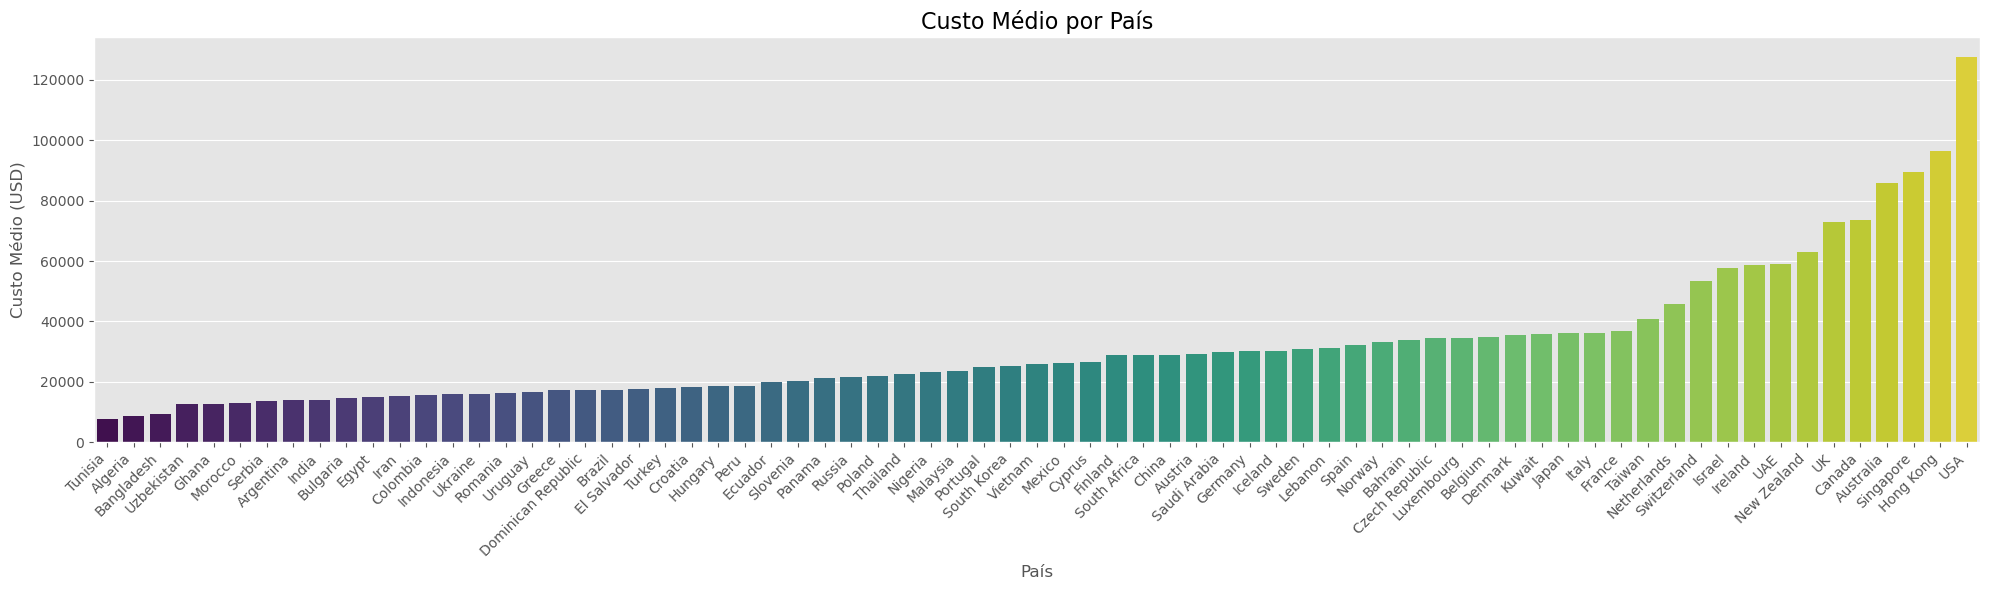

In [92]:
custo_medio_por_pais = df.groupby('Country')['Total_Complete_Program'].mean().sort_values(ascending=True)

plt.figure(figsize=(20,6))

sns.barplot(x=custo_medio_por_pais.index, y=custo_medio_por_pais.values, hue=custo_medio_por_pais.index, palette='viridis', legend=False)

plt.title('Custo Médio por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Custo Médio (USD)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [127]:
custo_medio_por_cidade = df.groupby('City')['Total_Monthly_Cost'].mean().sort_values(ascending=True)

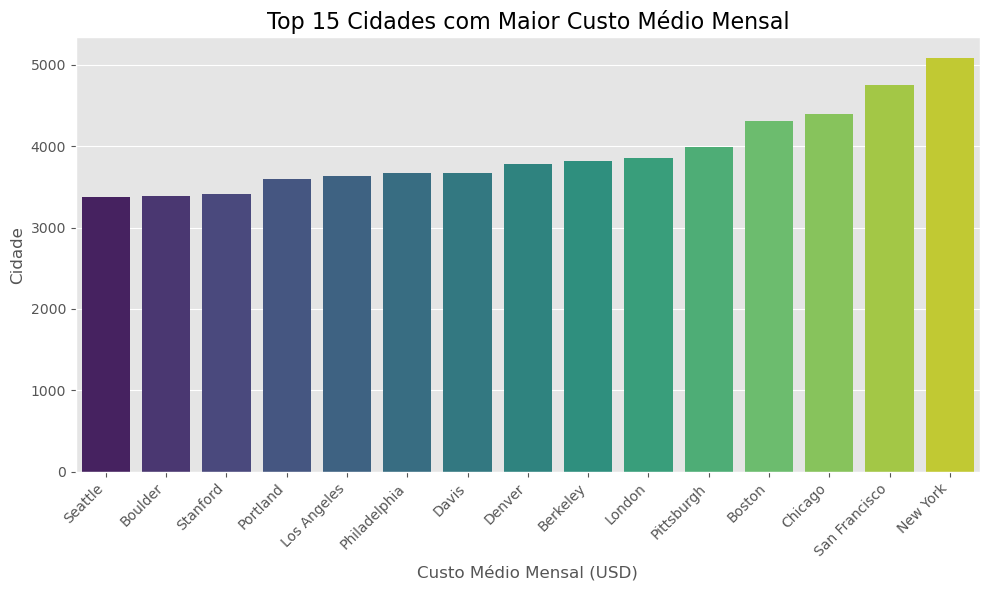

In [141]:
custo_top_cidades = custo_medio_por_cidade.tail(15)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_cidades.index,
    y=top_cidades.values,
    hue=top_cidades.index,
    palette='viridis',
    legend=False,
    orient='v'
)

plt.title('Top 15 Cidades com Maior Custo Médio Mensal', fontsize=16)
plt.xlabel('Custo Médio Mensal (USD)')
plt.ylabel('Cidade')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

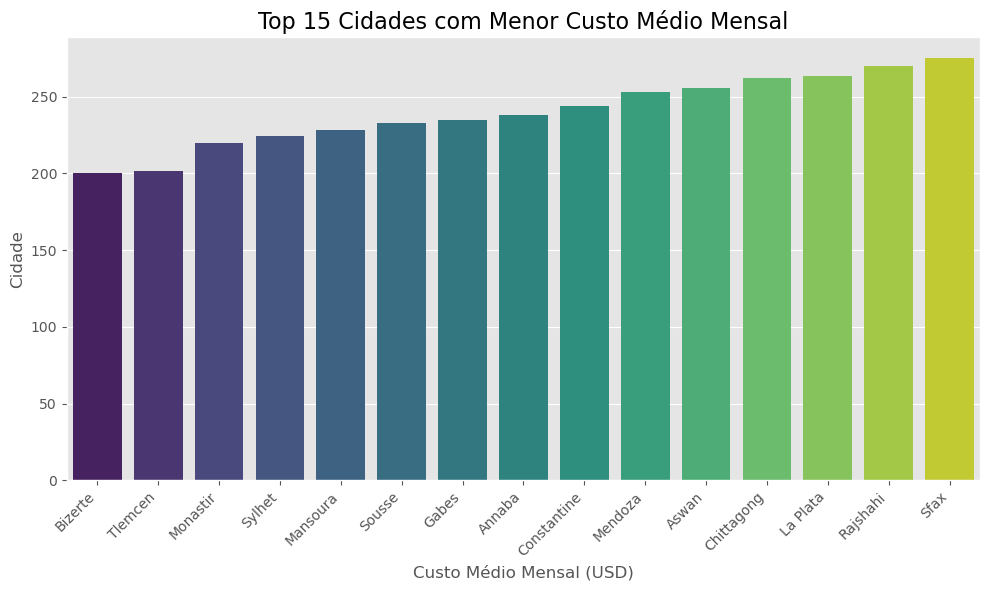

In [151]:
top_cidades = custo_medio_por_cidade.head(15)

plt.figure(figsize=(10,6))

sns.barplot(
    x=top_cidades.index,
    y=top_cidades.values,
    hue=top_cidades.index,
    palette='viridis',
    legend=False,
    orient='v'
)

plt.title('Top 15 Cidades com Menor Custo Médio Mensal', fontsize=16)
plt.xlabel('Custo Médio Mensal (USD)')
plt.ylabel('Cidade')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [153]:
df.head()


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Monthly_Cost,Total_Complete_Program
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,4633.333333,111360.0
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,5300.000000,64085.0
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,3279.166667,78935.0
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,3204.166667,77350.0
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,1166.666667,28075.0


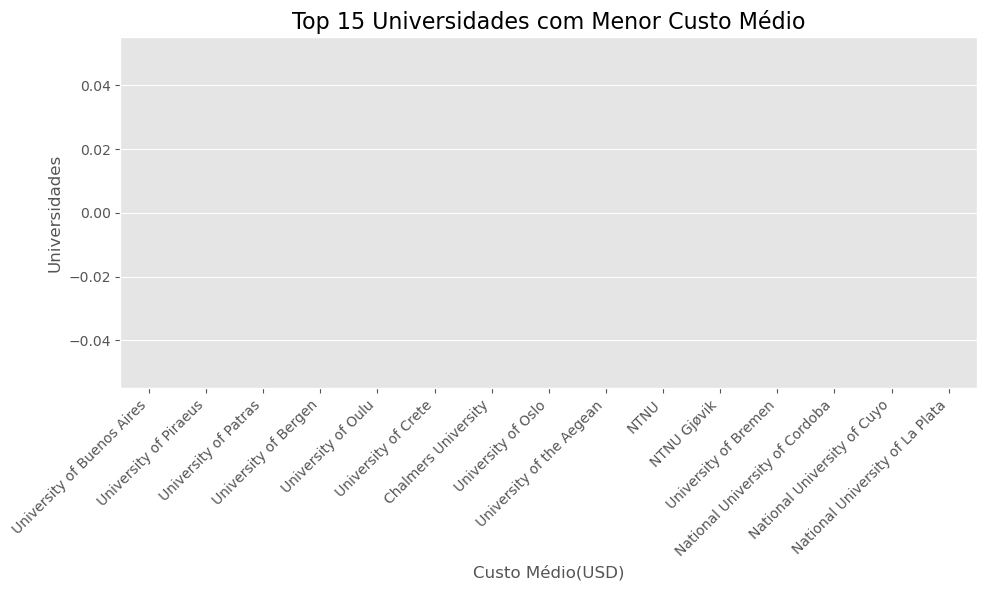

In [159]:
custo_universidade = df.groupby('University')['Tuition_USD'].mean().sort_values(ascending=True)

top_universidades = custo_universidade.head(15)

plt.figure(figsize=(10,6))

sns.barplot(
    x=top_universidades.index,
    y=top_universidades.values,
    hue=top_universidades.index,
    palette='viridis',
    legend=False,
    orient='v'
)

plt.title('Top 15 Universidades com Menor Custo Médio', fontsize=16)
plt.xlabel('Custo Médio(USD)')
plt.ylabel('Universidades')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

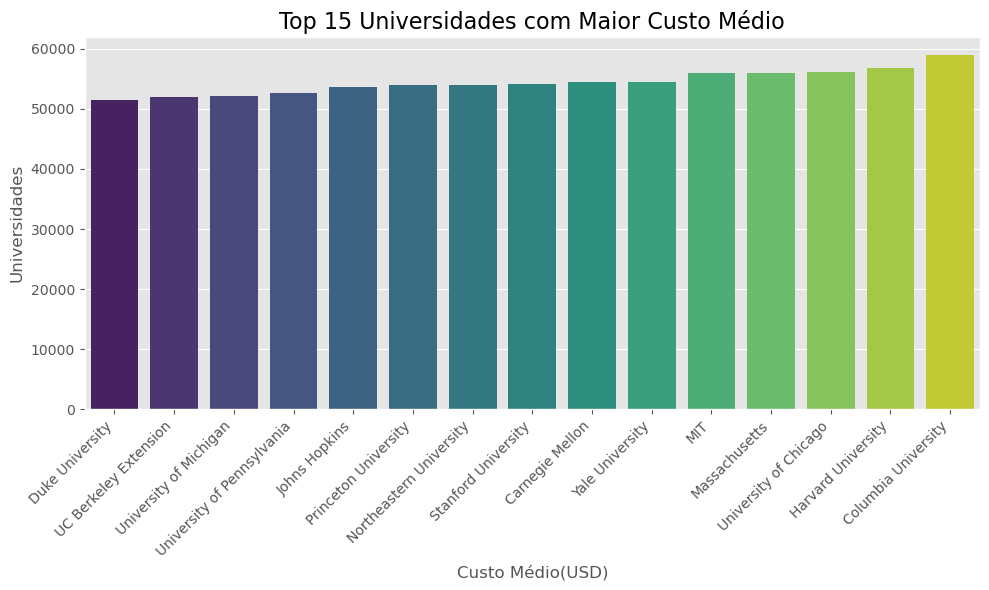

In [169]:
custo_universidade = df.groupby('University')['Tuition_USD'].mean().sort_values(ascending=True)

top_universidades = custo_universidade.tail(15)

plt.figure(figsize=(10,6))

sns.barplot(
    x=top_universidades.index,
    y=top_universidades.values,
    hue=top_universidades.index,
    palette='viridis',
    legend=False,
    orient='v'
)

plt.title('Top 15 Universidades com Maior Custo Médio', fontsize=16)
plt.xlabel('Custo Médio(USD)')
plt.ylabel('Universidades')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [163]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,Total_Monthly_Cost,Total_Complete_Program
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,4633.333333,111360.0
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79,5300.000000,64085.0
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35,3279.166667,78935.0
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52,3204.166667,77350.0
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92,1166.666667,28075.0


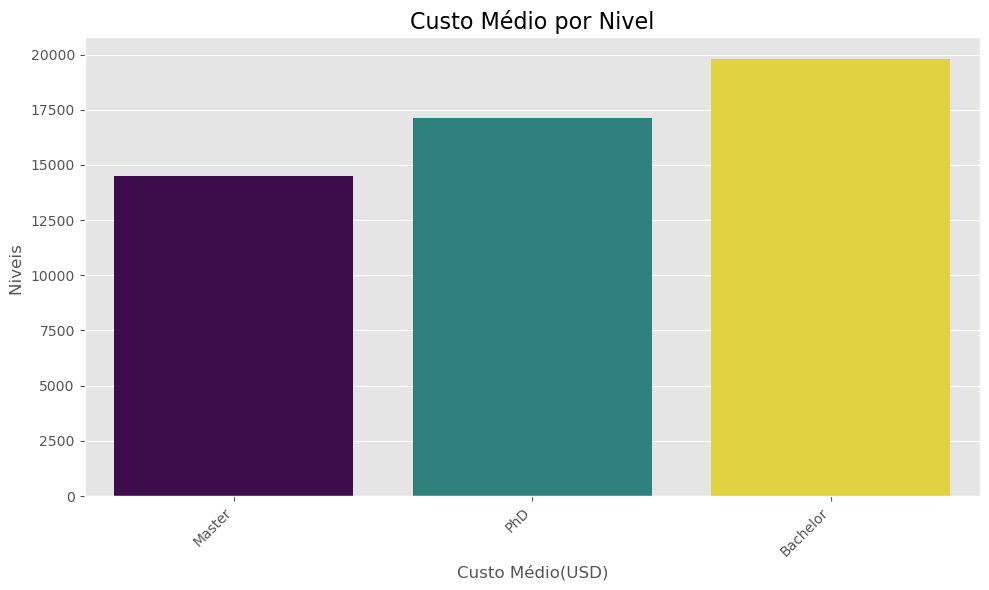

In [224]:
custo_por_nivel = df.groupby('Level')['Tuition_USD'].mean().sort_values(ascending=True)

top_level = custo_por_nivel.tail()

plt.figure(figsize=(10,6))

sns.barplot(
    x=top_level.index,
    y=top_level.values,
    hue=top_level.values,
    palette='viridis',
    legend=False,
    orient='v'
)

plt.title('Custo Médio por Nivel', fontsize=16)
plt.xlabel('Custo Médio(USD)')
plt.ylabel('Niveis ')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

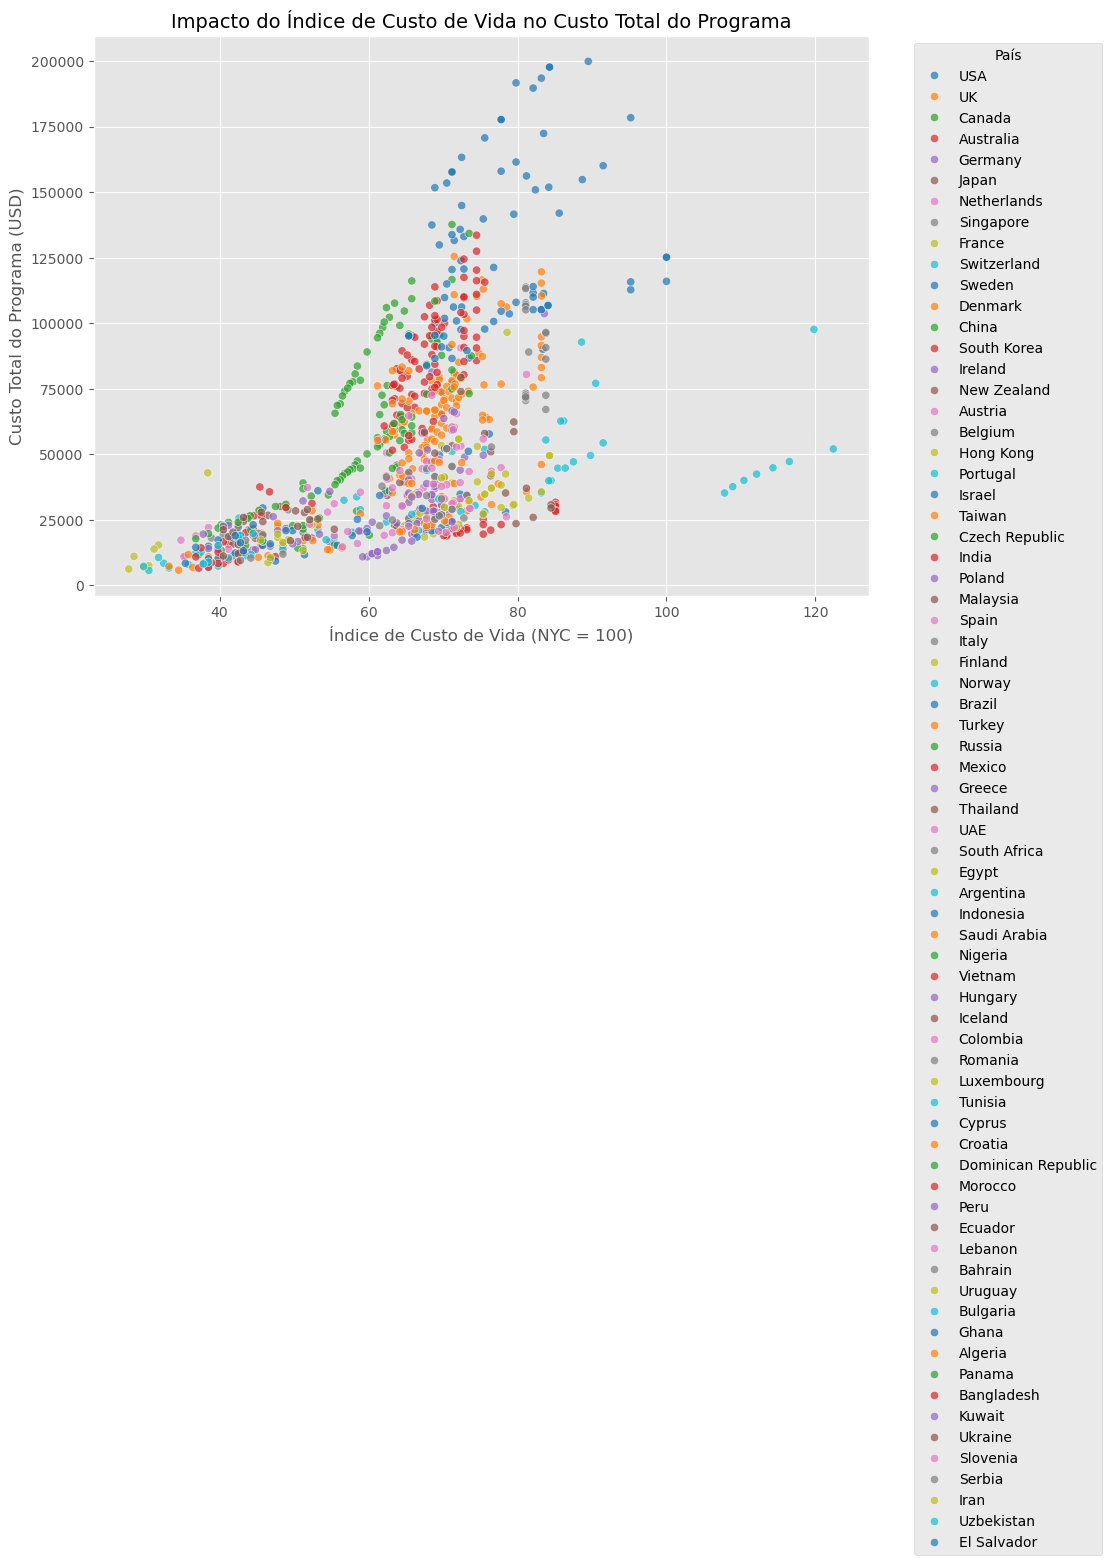

In [206]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Living_Cost_Index',
    y='Total_Complete_Program',
    hue='Country',
    palette='tab10',
    alpha=0.7
)

plt.title('Impacto do Índice de Custo de Vida no Custo Total do Programa', fontsize=14)
plt.xlabel('Índice de Custo de Vida (NYC = 100)', fontsize=12)
plt.ylabel('Custo Total do Programa (USD)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.9, bottom=0.2)
plt.show()


# 6. Respostas dos Questionamentos

<b> 1. Quais cidades têm um alto custo de vida, mas surpreendem com programas mais baratos?</b>


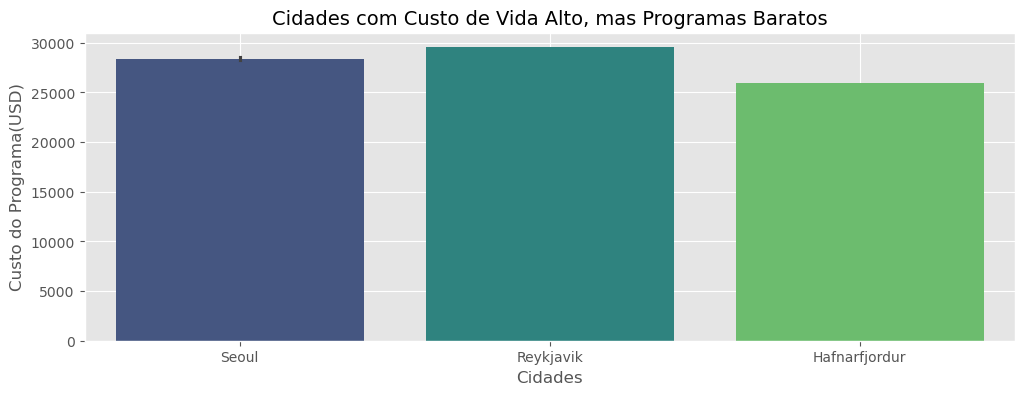

In [364]:
cidades_inesperadas = df[(df['Living_Cost_Index'] > 80) & (df['Total_Complete_Program'] < 30000)]

top_cidades_inesperadas = cidades_inesperadas.tail()

plt.figure(figsize=(12, 4))

sns.barplot(
    data=top_cidades_inesperadas,
    x='City',
    y='Total_Complete_Program',
    palette='viridis',
    hue='City',
    legend=False
    
)

plt.title('Cidades com Custo de Vida Alto, mas Programas Baratos', fontsize=14)
plt.xlabel('Cidades')
plt.ylabel('Custo do Programa(USD)')
plt.grid(True)

plt.show()

<b>2. Quais cidades oferecem programas mais caros mesmo com um custo de vida relativamente baixo?</b>

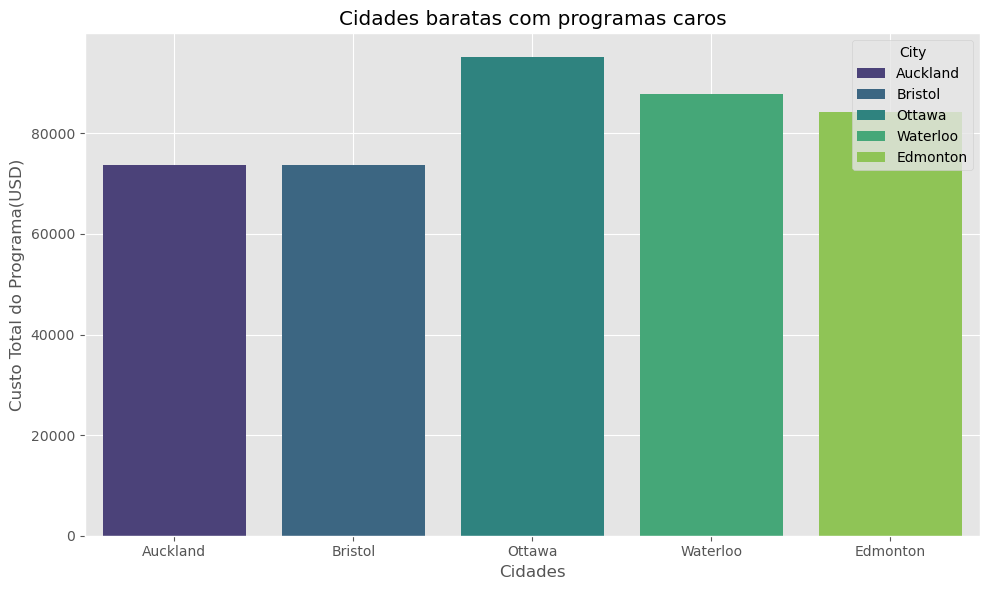

In [312]:
cidades_baratas = df[(df['Living_Cost_Index'] < 70) & (df['Total_Complete_Program'] > 50000)]

top_cidades_baratas = cidades_baratas.head()

plt.figure(figsize=(10,6))

sns.barplot(
    data=top_cidades_baratas,
    x='City',
    y='Total_Complete_Program',
    palette='viridis',
    hue='City',
    legend=True
)

plt.title('Cidades baratas com programas caros')
plt.xlabel('Cidades')
plt.ylabel('Custo Total do Programa(USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


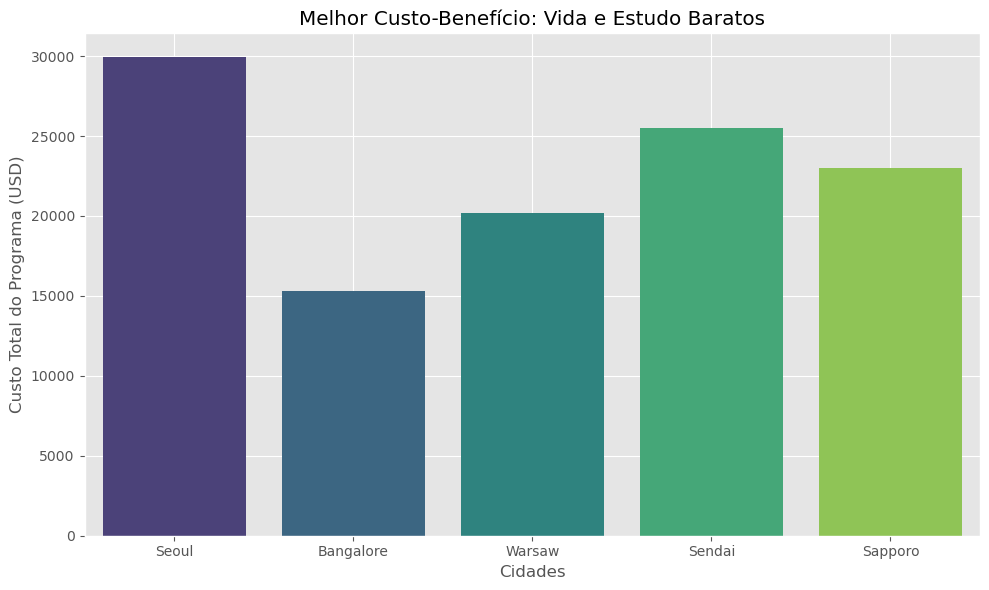

In [314]:
boas_opcoes = df[(df['Living_Cost_Index'] < 70) & (df['Total_Complete_Program'] < 30000)]

custo_beneficio = boas_opcoes.head()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=custo_beneficio,
    x='City',
    y='Total_Complete_Program',
    hue='City',
    palette='viridis',
    legend=False
)
plt.title('Melhor Custo-Benefício: Vida e Estudo Baratos')
plt.xlabel('Cidades')
plt.ylabel('Custo Total do Programa (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


<b>3. Há um padrão claro entre custo de vida e o custo total do programa?</b>

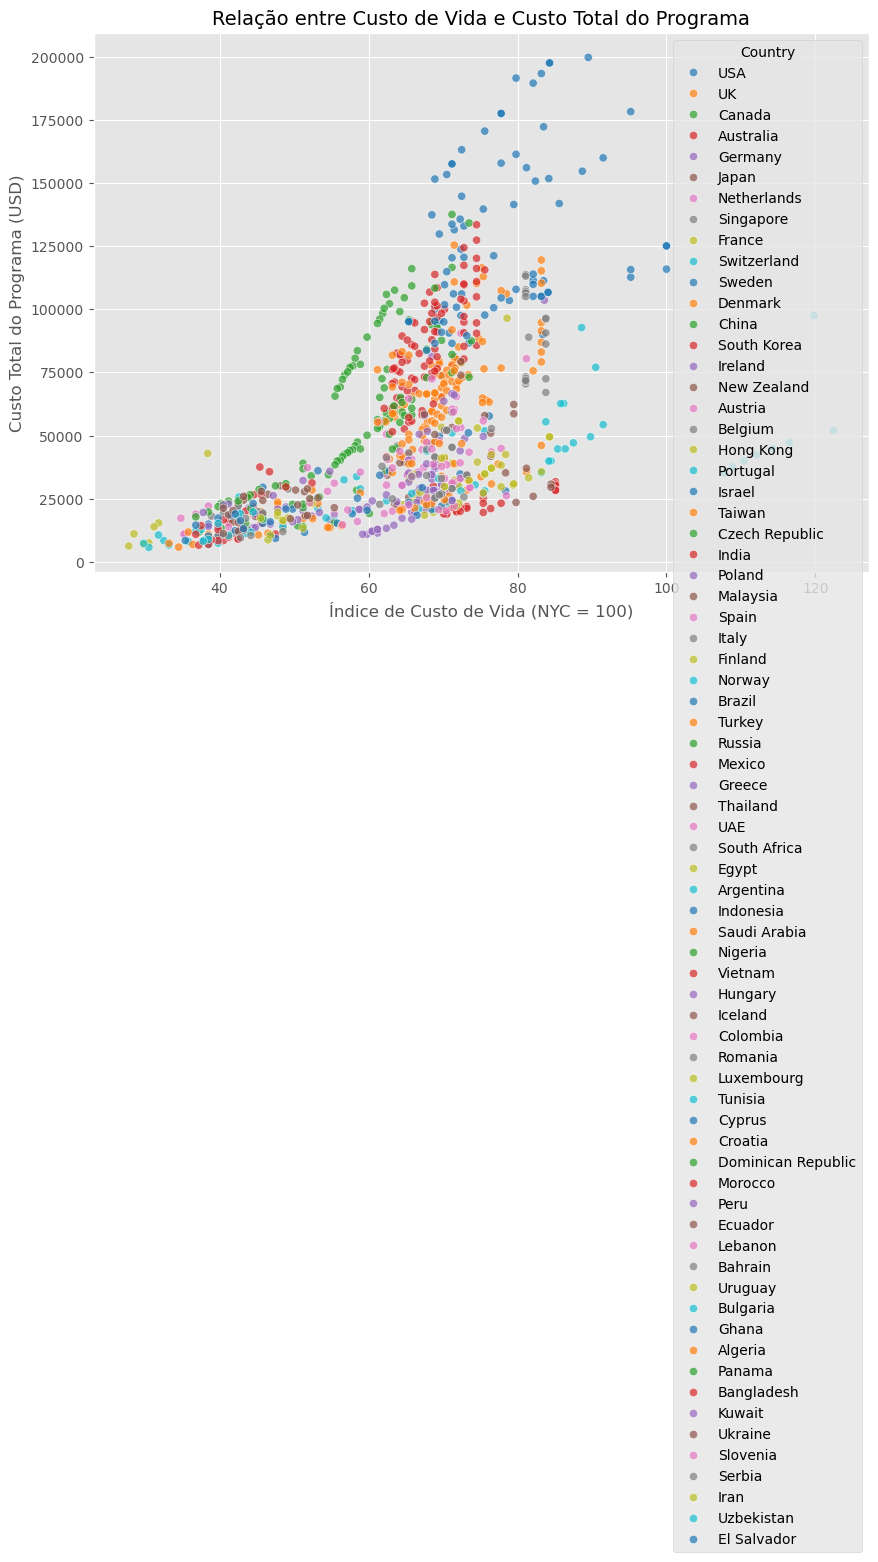

In [362]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='Living_Cost_Index',
    y='Total_Complete_Program',
    hue='Country',
    palette='tab10',
    alpha=0.7
)
plt.title('Relação entre Custo de Vida e Custo Total do Programa', fontsize=14)
plt.xlabel('Índice de Custo de Vida (NYC = 100)')
plt.ylabel('Custo Total do Programa (USD)')
plt.grid(True)

plt.show()

<b>4. Algum país concentra cidades com custo-benefício mais vantajoso?</b>

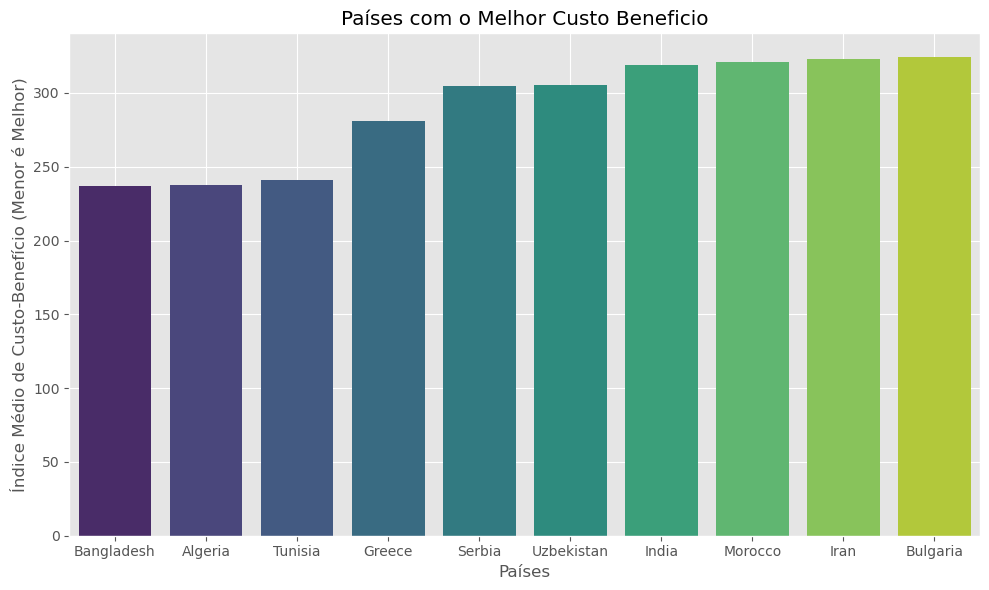

In [368]:
df['Custo_Beneficio'] = df['Total_Complete_Program'] / df['Living_Cost_Index']

pais_beneficio = df.groupby('Country')['Custo_Beneficio'].mean().sort_values()

top_paises = pais_beneficio.head(10)

plt.figure(figsize=(10,6))

sns.barplot(
    x=top_paises.index, 
    y=top_paises.values, 
    palette='viridis',
    hue=top_paises.index,
    legend=False
)
plt.title("Países com o Melhor Custo Beneficio")
plt.xlabel('Países')
plt.ylabel('Índice Médio de Custo-Benefício (Menor é Melhor)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Conclusões da Análise
<b>- Existem cidades com custo de vida elevado, mas programas acessíveis.</b>
<br>
Apesar de parecerem caras para viver, algumas cidades surpreendem ao oferecer cursos completos por valores abaixo de US$30.000, mostrando que o custo de vida não é um indicador absoluto do valor total da graduação.

<b>- Também há cidades baratas com programas extremamente caros.</b>
<br>
Algumas cidades com índice de custo de vida abaixo de 70 possuem programas educacionais que ultrapassam os US$50.000, alertando que economia no dia a dia pode ser anulada por mensalidades ou taxas altas.

<b>- O custo de vida não tem correlação forte com o custo total do programa. </b>
<br>
Ao analisar graficamente os dois indicadores, nota-se que não há um padrão fixo. Existe uma grande variação entre cidades e países, o que reforça a importância de analisar ambos separadamente.

<b>- Alguns países concentram cidades com ótimo custo-benefício. </b>
<br>
Países como Bulgaria, Iran, Morocco e India se destacam por reunirem várias cidades onde o custo de vida e o valor total do curso são equilibrados, oferecendo uma excelente oportunidade para estudantes internacionais.

<b> - Cidades alternativas devem ser consideradas na escolha de onde estudar. </b>
<br>
Cidades menos óbvias podem oferecer a mesma qualidade de ensino com custos totais muito mais baixos. Essas descobertas ajudam estudantes a tomarem decisões mais econômicas e estratégicas.

<b> - A Segurança deve ser priorizada na sua escolha, não adianta o programa completo ter um ótimo custo-benefício e ser um péssimo lugar para estudantes de diferentes culturas. </b>